Date: 03/16/2025  
Author: Seyed A. Banihashemi  
Purpose:  Initial model exploration for the alzheimers dataset from kaggle. 

# Model Exploration 

In this notebook, I examined various classifying models for the Kaggle database. Each model is examined on various subcategories of features and the accuracy rates are compared.  
The models considered in this notebook are:
- KNN ($k$ Nearest Neighbors) classifier
- SVM (Support Vector Machines)
- Decision Trees
- Adaptive Boosting

In [77]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

In [6]:
## Reading the traning and testing datasets
df = pd.read_csv("../data/kaggle_train.csv")

## Dropping redundant columns
df = df.drop(columns = ['DoctorInCharge' , 'PatientID' ])

df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,87,1,2,1,27.764232,1,16.543170,0.281379,5.923418,7.836104,...,3.085543,0,0,6.643693,0,0,0,0,0,0
1,70,0,0,3,37.098744,0,1.360202,9.242990,1.819284,5.218052,...,5.616830,0,1,3.884562,0,0,0,0,1,1
2,82,1,3,2,15.908275,0,16.329031,1.915913,6.607292,6.146166,...,3.662461,0,0,4.013722,0,0,1,1,0,1
3,76,1,0,2,30.302432,1,11.814030,6.281170,6.204349,6.825155,...,4.648135,0,0,9.355700,1,0,1,0,1,0
4,61,0,0,2,24.565357,1,2.273373,9.976581,2.057188,4.715534,...,9.601238,1,0,8.818932,0,1,0,0,0,1


In [7]:
## Seperating features into subcategories

all_features = [   'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
               'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
               'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
               'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
               'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
               'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
               'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
               'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
               'Forgetfulness' , 'Diagnosis']
demo_features = ['Age', 'Gender', 'Ethnicity','EducationLevel','Diagnosis']
life_style_features = ['BMI','Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality','Diagnosis']
medic_hist_features = ['FamilyHistoryAlzheimers', 'CardiovascularDisease','Diabetes', 'Depression', 'HeadInjury', 'Hypertension','Diagnosis']
clinical_features = ['SystolicBP','DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL','CholesterolTriglycerides','Diagnosis']
cognitive_features = ['MMSE', 'FunctionalAssessment','MemoryComplaints', 'BehavioralProblems', 'ADL','Diagnosis']
symptoms_features = ['Confusion','Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks','Forgetfulness','Diagnosis']

no_cognitive = [item for item in all_features if item not in cognitive_features]
no_cognitive.append('Diagnosis')

subcategory_dict = {'all_features' : all_features,'demo':demo_features ,'lifestyle': life_style_features , 'medic' : medic_hist_features , 
                    'clinical':clinical_features , 'cognitive': cognitive_features , 'symptoms': symptoms_features , 'no_cognitive': no_cognitive}


In [8]:
## Spliting the training dataset
from sklearn.model_selection import train_test_split

## Making a statified train test split
df_train, df_test = train_test_split(df, random_state= 123 , shuffle= True,
                                     test_size=0.2, stratify=df['Diagnosis'])

## KNN Classifier

In [64]:
## Importing the packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, root_mean_squared_error, confusion_matrix

In [68]:
## Making the pipeline
knn_pipe = Pipeline([('scale', StandardScaler()) , ('knn' , KNeighborsClassifier(10))])

## Accuracy score for each subcategory of features
accu_score = {}

## Confusion matrix for each subcategory of features
knn_conf_matrix = {}

## Running the classifier through each subcategory
for key in subcategory_dict:
    item = subcategory_dict[key]

    ## fit the model object
    knn_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)

    ## predict the testing set
    pred = knn_pipe.predict(df_test[item[:-1]])

    ## saving accuracy scores
    accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                       precision_score(pred, df_test.Diagnosis),
                       recall_score(pred, df_test.Diagnosis),
                       f1_score(pred, df_test.Diagnosis),
                       root_mean_squared_error(pred, df_test.Diagnosis)]

    ## saving confusion matrices
    knn_conf_matrix[key] = confusion_matrix(pred,df_test.Diagnosis)
    
knn_accu_score = pd.DataFrame(accu_score)
knn_accu_score.index = ['Accuracy Score', 'Precision Score' , 'Recall Score', 'F1 Score','MSE']
knn_accu_score

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.729651,0.633721,0.654070,0.604651,0.627907,0.918605,0.566860,0.607558
Precision Score,0.314050,0.066116,0.082645,0.107438,0.099174,0.834711,0.272727,0.049587
Recall Score,0.791667,0.380952,0.555556,0.317073,0.387097,0.926606,0.351064,0.230769
F1 Score,0.449704,0.112676,0.143885,0.160494,0.157895,0.878261,0.306977,0.081633
MSE,0.519951,0.605210,0.588158,0.628768,0.609994,0.285299,0.658133,0.626452


#### KNN Confusion Matrices

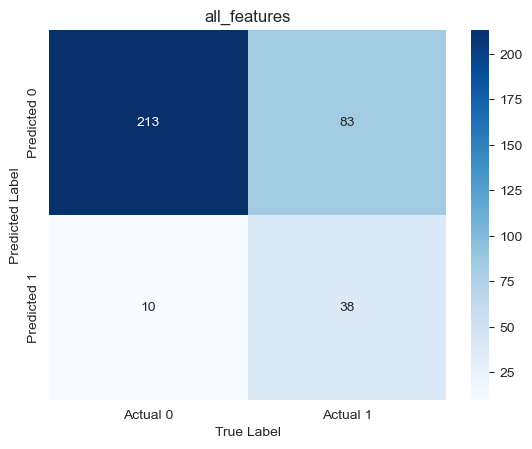

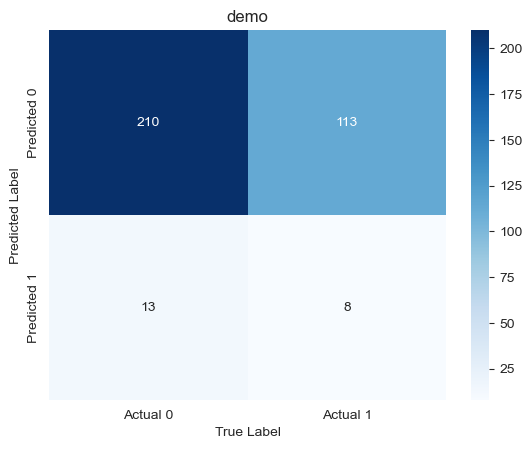

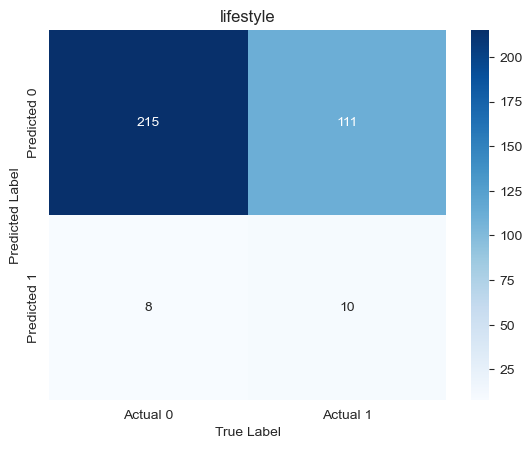

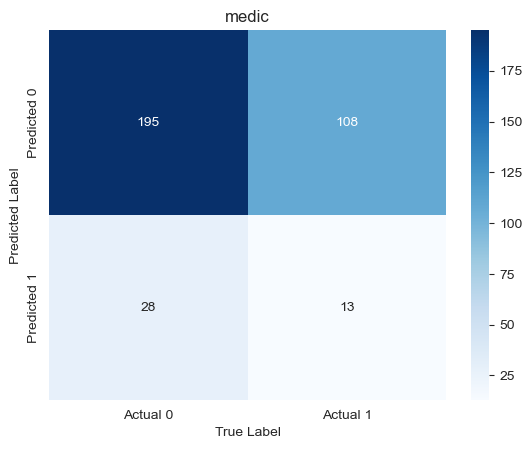

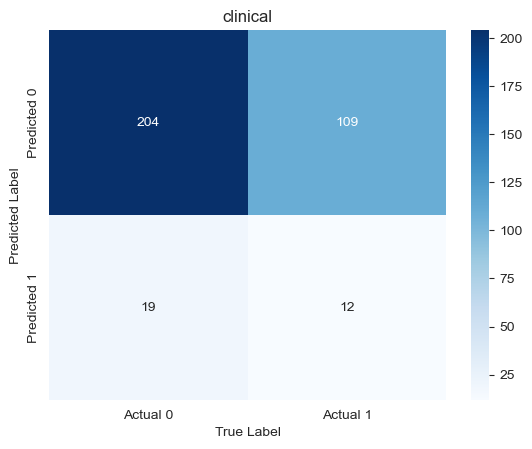

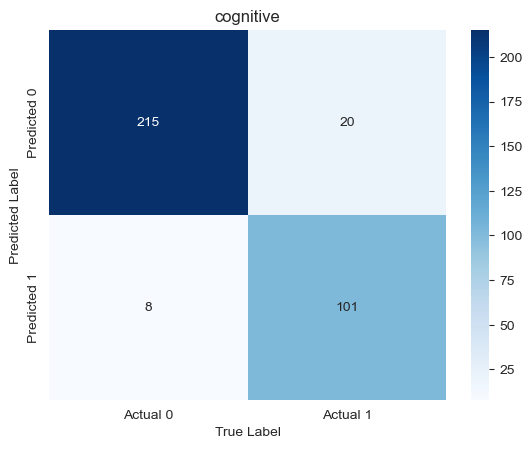

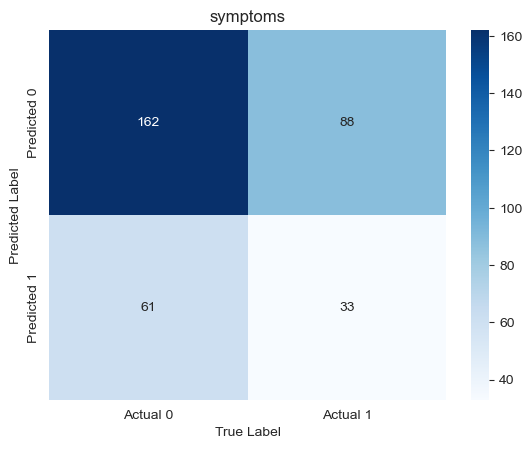

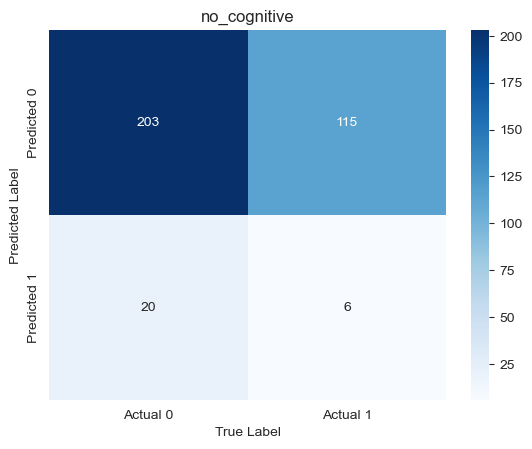

In [89]:
for key,item in knn_conf_matrix.items():
    sns.heatmap(item, annot=True, fmt="d", cmap="Blues", yticklabels=["Predicted 0", "Predicted 1"], xticklabels=["Actual 0", "Actual 1"])
    plt.ylabel("Predicted Label")
    plt.xlabel("True Label")
    plt.title(key)
    plt.show()

## SVM

We will try Support Vector Machines with different kernels and try to optimize the hyperparameters for each subcategory of features.  
We will examine the following kernels:  
- Polynomials (of degree between 1 to 4)
- Gaussian Radial Basis Function (RBF)
- Sigmoid

In [15]:
## Importing the packages
from sklearn.svm import SVC

### Polynomial kernel

In [81]:

## Setting range for regularization parameter
C = [100,10,1,0.1,0.01]

## Setting range for degrees of the polynomial kernel
degrees = [1,2,3,4]

## Accuracy score for each subcategory of features
svm_poly_accu = {}

## Confusion matrix for each subcategory of features
poly_conf_matrix = {}

## Running each subcategory through each polynomial SVM
for key in subcategory_dict:
    item = subcategory_dict[key]

    ## variables that record to most accurate parameters
    C_best = 0
    d_best = 0
    accu_best = 0
    f1_best = 0
    precision_best = 0
    recall_best = 0
    mse_best = 0
    confusion_best = 0
    
    for c,d in zip(C,degrees):
        ## creating a model with polynomial kernel of degree = d and regularization parameter C = c
        svm_poly = SVC(C=c , kernel='poly' , degree= d , max_iter=10000)

        ## fitting the model object
        svm_poly.fit(df_train[item[:-1]] , df_train.Diagnosis)

        ## predicting the testing set
        pred = svm_poly.predict(df_test[item[:-1]])
        if accuracy_score(pred , df_test.Diagnosis)>accu_best:
            accu_best = accuracy_score(pred , df_test.Diagnosis)
            C_best = c
            d_best = d
            mse_best = root_mean_squared_error(pred, df_test.Diagnosis)
            f1_best = f1_score(pred, df_test.Diagnosis)
            precision_best = precision_score(pred, df_test.Diagnosis)
            recall_best = recall_score(pred, df_test.Diagnosis)
            confusion_best = confusion_matrix(pred, df_test.Diagnosis)

    svm_poly_accu[key] = [accu_best,precision_best, recall_best, f1_best ,mse_best , C_best , d_best]
    poly_conf_matrix[key] = confusion_best
    
svm_poly_accu_df = pd.DataFrame(svm_poly_accu)
svm_poly_accu_df.index = ['Accuracy Score', 'Precision Score', 'Recall Score' , 'F1 Score' , 'MSE' ,'C', 'degree']
svm_poly_accu_df

C:\Users\banih\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\banih\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\banih\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\banih\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.781977,0.648256,0.648256,0.651163,0.648256,0.831395,0.648256,0.648256
Precision Score,0.545455,0.000000,0.000000,0.024793,0.000000,0.785124,0.000000,0.000000
Recall Score,0.767442,0.000000,0.000000,0.600000,0.000000,0.748031,0.000000,0.000000
F1 Score,0.637681,0.000000,0.000000,0.047619,0.000000,0.766129,0.000000,0.000000
MSE,0.466930,0.593080,0.593080,0.590624,0.593080,0.410615,0.593080,0.593080
C,100.000000,100.000000,100.000000,10.000000,100.000000,100.000000,100.000000,100.000000
degree,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


#### Polynomial Kernel Confusion Matrices

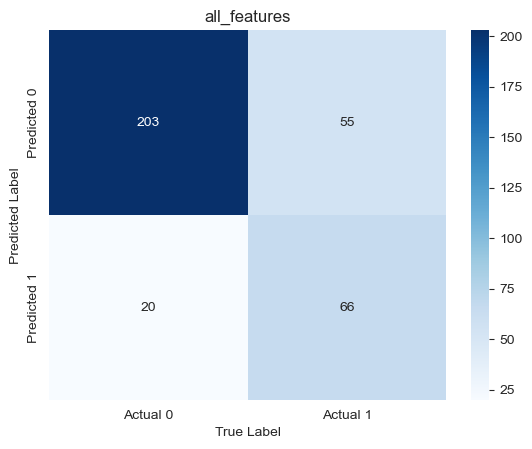

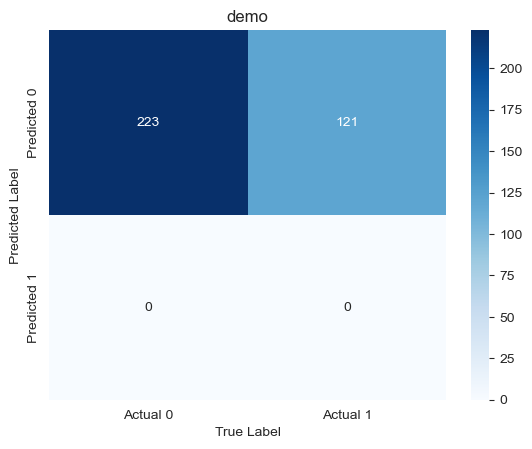

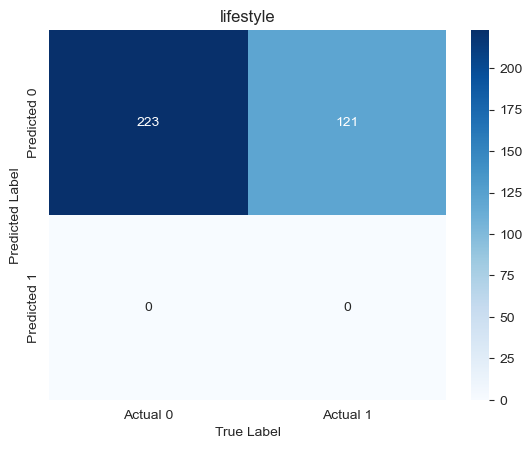

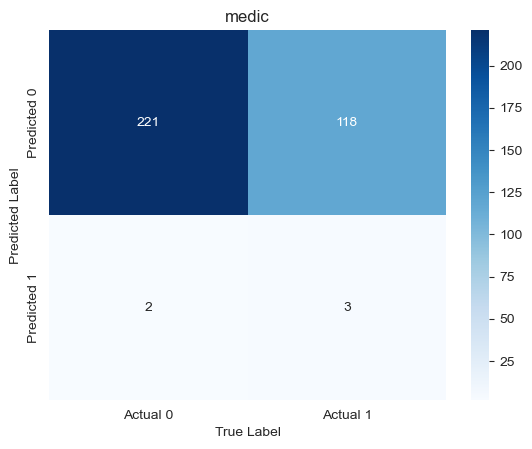

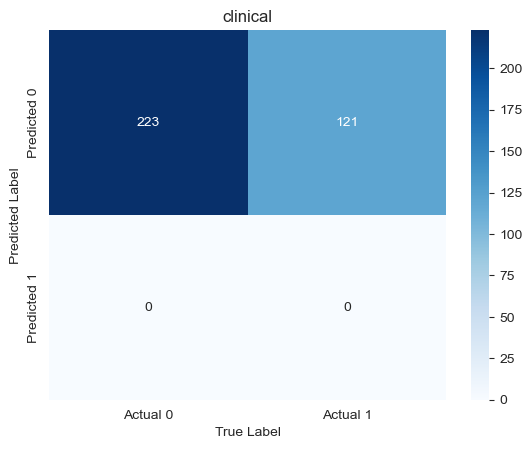

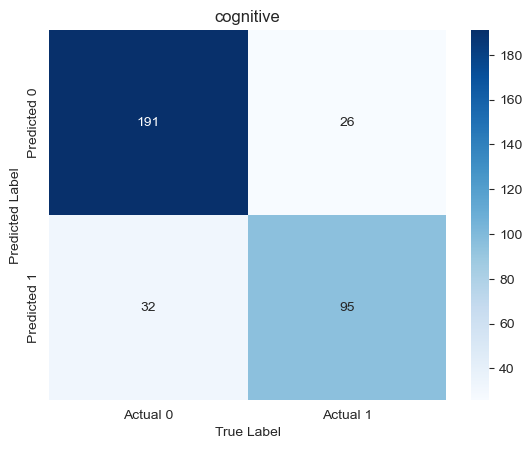

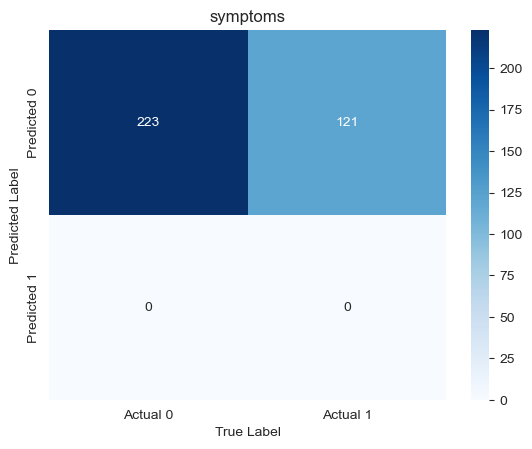

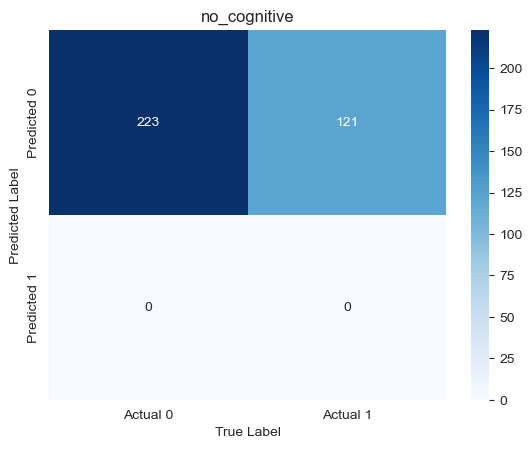

In [87]:
for key,item in poly_conf_matrix.items():
    sns.heatmap(item, annot=True, fmt="d", cmap="Blues", yticklabels=["Predicted 0", "Predicted 1"], xticklabels=["Actual 0", "Actual 1"])
    plt.ylabel("Predicted Label")
    plt.xlabel("True Label")
    plt.title(key)
    plt.show()

### Gaussian RBF

In [92]:
## Setting range for regularization parameter
C = [100,10,1,0.1,0.01]

## Setting range for the parameter gamma
gammas = [1,0.1,0.01,0.001]

## Accuracy score for each subcategory of features
svm_rbf_accu = {}

## Confusion matrix for each subcategory of features
rbf_conf_matrix = {}

## Running each subcategory through each RBF SVM
for key in subcategory_dict:
    item = subcategory_dict[key]

    ## variables that record to most accurate parameters
    C_best = 0
    gamma_best = 0
    accu_best = 0
    f1_best = 0
    precision_best = 0
    recall_best = 0
    mse_best = 0
    confusion_best = 0
    
    for c,gamma in zip(C,gammas):
        ## creating a model with RBF of gamma = gamma and regularization parameter C = c
        svm_rbf = SVC(C=c , kernel='rbf' , gamma = gamma , max_iter=10000)

        ## fitting the model object
        svm_rbf.fit(df_train[item[:-1]] , df_train.Diagnosis)

        ## predicting the testing set
        pred = svm_rbf.predict(df_test[item[:-1]])
        if accuracy_score(pred , df_test.Diagnosis)>accu_best:
            accu_best = accuracy_score(pred , df_test.Diagnosis)
            C_best = c
            gamma_best = gamma
            mse_best = root_mean_squared_error(pred, df_test.Diagnosis)
            f1_best = f1_score(pred, df_test.Diagnosis)
            precision_best = precision_score(pred, df_test.Diagnosis)
            recall_best = recall_score(pred, df_test.Diagnosis)
            confusion_best = confusion_matrix(pred, df_test.Diagnosis)

    svm_rbf_accu[key] = [accu_best, precision_best , recall_best , f1_best ,mse_best , C_best , gamma_best]
    rbf_conf_matrix[key] = confusion_best
svm_rbf_accu_df = pd.DataFrame(svm_rbf_accu)
svm_rbf_accu_df.index = ['Accuracy Score','Precision Score', 'Recall Score' , 'F1 Score', 'MSE' , 'C', '$\gamma$']
svm_rbf_accu_df

<>:49: SyntaxWarning: invalid escape sequence '\g'
<>:49: SyntaxWarning: invalid escape sequence '\g'
C:\Users\banih\AppData\Local\Temp\ipykernel_25636\2039184384.py:49: SyntaxWarning: invalid escape sequence '\g'
  svm_rbf_accu_df.index = ['Accuracy Score','Precision Score', 'Recall Score' , 'F1 Score', 'MSE' , 'C', '$\gamma$']
C:\Users\banih\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\banih\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\banih\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set t

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.648256,0.654070,0.651163,0.654070,0.648256,0.941860,0.648256,0.648256
Precision Score,0.000000,0.041322,0.016529,0.016529,0.000000,0.917355,0.000000,0.000000
Recall Score,0.000000,0.625000,0.666667,1.000000,0.000000,0.917355,0.000000,0.000000
F1 Score,0.000000,0.077519,0.032258,0.032520,0.000000,0.917355,0.000000,0.000000
MSE,0.593080,0.588158,0.590624,0.588158,0.593080,0.241121,0.593080,0.593080
C,100.000000,10.000000,100.000000,10.000000,100.000000,10.000000,100.000000,100.000000
$\gamma$,1.000000,0.100000,1.000000,0.100000,1.000000,0.100000,1.000000,1.000000


#### RBF Kernel Confusion Matrices

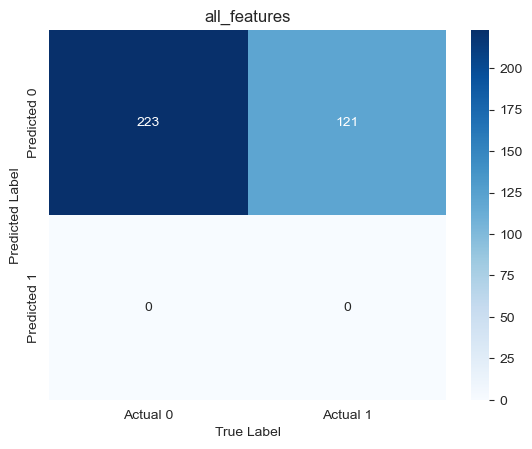

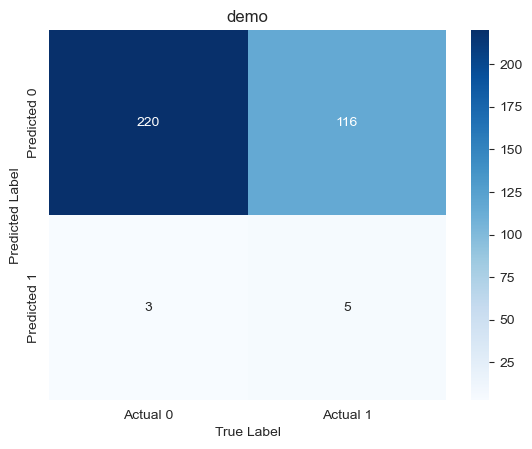

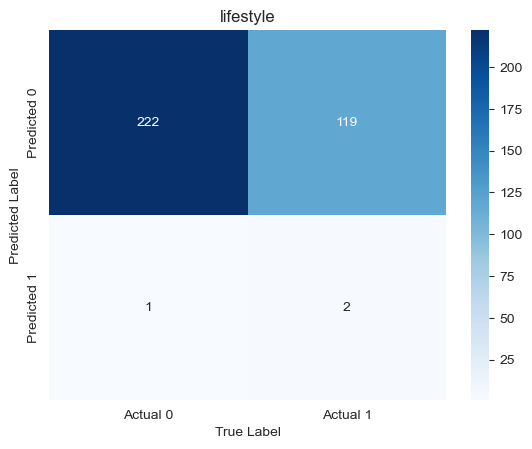

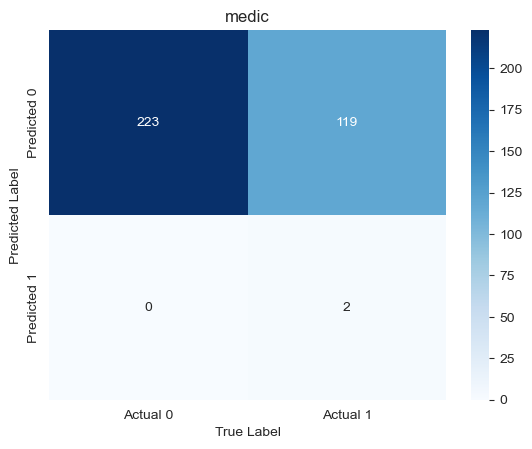

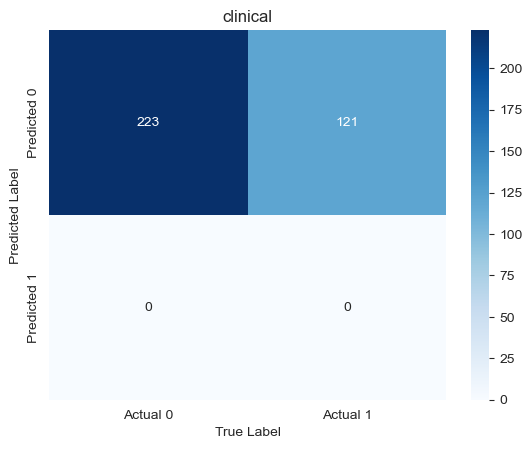

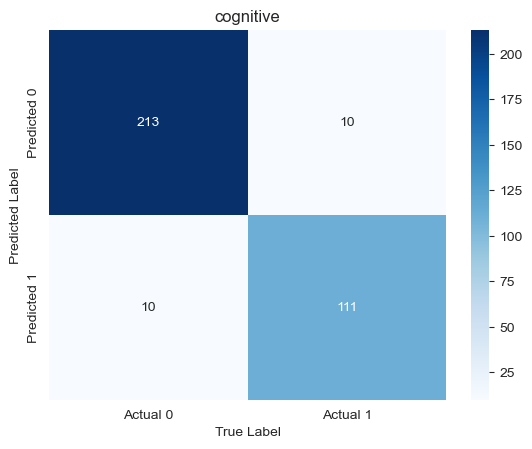

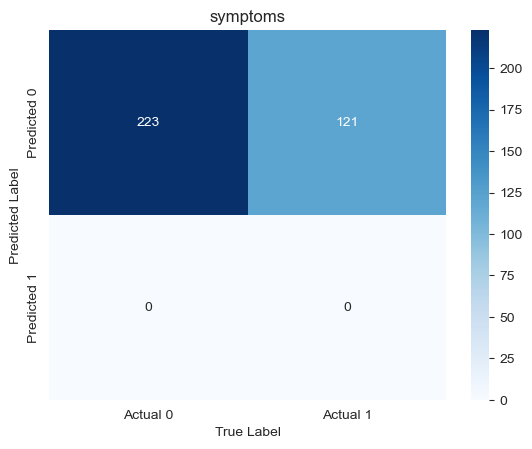

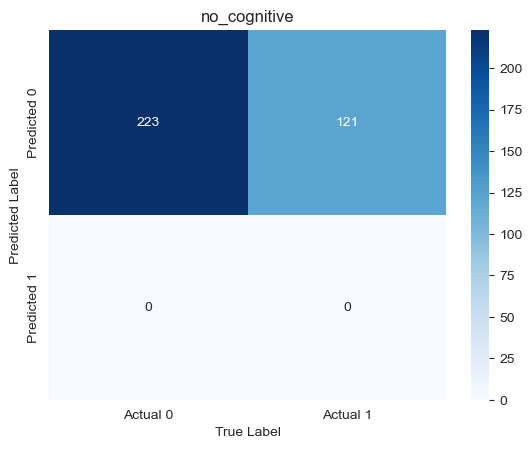

In [95]:
for key,item in rbf_conf_matrix.items():
    sns.heatmap(item, annot=True, fmt="d", cmap="Blues", yticklabels=["Predicted 0", "Predicted 1"], xticklabels=["Actual 0", "Actual 1"])
    plt.ylabel("Predicted Label")
    plt.xlabel("True Label")
    plt.title(key)
    plt.show()

### Sigmoid kernel

In [103]:
## Setting range for regularization parameter
C = [100,10,1,0.1,0.01]

## Setting range for the parameter gamma
gammas = [1,0.1,0.01,0.001]

## Setting range for coeff0
coeffs = [-1,0,1]

## Accuracy score for each subcategory of features
svm_sig_accu = {}

## Confusion matrix for each subcategory of features
sigmoid_conf_matrix = {}

## Running each subcategory through each RBF SVM
for key in subcategory_dict:
    item = subcategory_dict[key]

    ## variables that record to most accurate parameters
    C_best = 0
    gamma_best = 0
    coeff_best = 0
    accu_best = 0
    f1_best = 0
    precision_best = 0
    recall_best = 0
    mse_best = 0
    confusion_best = 0
    
    for c,gamma,coeff in zip(C,gammas,coeffs):
        ## creating a model with RBF of gamma = gamma and regularization parameter C = c
        svm_sig = SVC(C=c , kernel='sigmoid' , gamma = gamma, coef0=coeff , max_iter=10000)

        ## fitting the model object
        svm_sig.fit(df_train[item[:-1]] , df_train.Diagnosis)

        ## predicting the testing set
        pred = svm_sig.predict(df_test[item[:-1]])
        if accuracy_score(pred , df_test.Diagnosis)>accu_best:
            accu_best = accuracy_score(pred , df_test.Diagnosis)
            C_best = c
            gamma_best = gamma
            coeff_best = coeff
            mse_best = root_mean_squared_error(pred, df_test.Diagnosis)
            f1_best = f1_score(pred, df_test.Diagnosis)
            precision_best = precision_score(pred, df_test.Diagnosis)
            recall_best = recall_score(pred, df_test.Diagnosis)
            confusion_best = confusion_matrix(pred, df_test.Diagnosis)
            
    svm_sig_accu[key] = [accu_best ,precision_best , recall_best , f1_best, mse_best ,C_best , gamma_best, coeff_best]
    sigmoid_conf_matrix[key] = confusion_best
svm_sig_accu_df = pd.DataFrame(svm_sig_accu)
svm_sig_accu_df.index = ['Accuracy Score', 'Precision Score', 'Recall Score' , 'F1 Score','MSE', 'C', '$\gamma$', 'coeff0']
svm_sig_accu_df

<>:54: SyntaxWarning: invalid escape sequence '\g'
<>:54: SyntaxWarning: invalid escape sequence '\g'
C:\Users\banih\AppData\Local\Temp\ipykernel_25636\3704495385.py:54: SyntaxWarning: invalid escape sequence '\g'
  svm_sig_accu_df.index = ['Accuracy Score', 'Precision Score', 'Recall Score' , 'F1 Score','MSE', 'C', '$\gamma$', 'coeff0']
C:\Users\banih\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\banih\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\banih\anaconda3\Lib\site-packages\sklearn\m

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.648256,0.648256,0.648256,0.648256,0.648256,0.648256,0.648256,0.648256
Precision Score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Recall Score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
F1 Score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MSE,0.593080,0.593080,0.593080,0.593080,0.593080,0.593080,0.593080,0.593080
C,100.000000,100.000000,100.000000,1.000000,100.000000,100.000000,1.000000,100.000000
$\gamma$,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000,0.010000,1.000000
coeff0,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000


#### Sigmoid Kernel Confusion Matrices

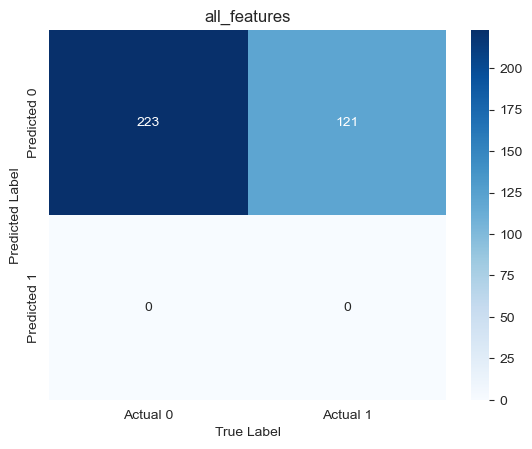

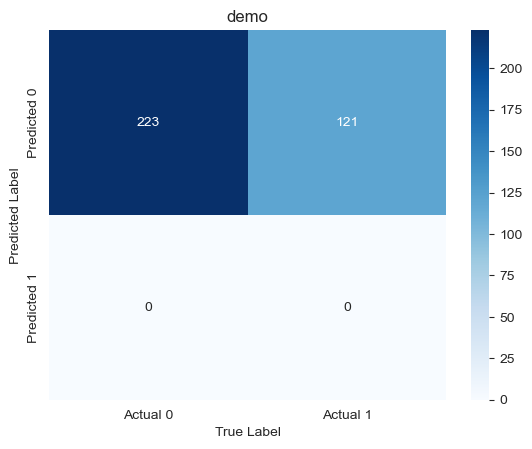

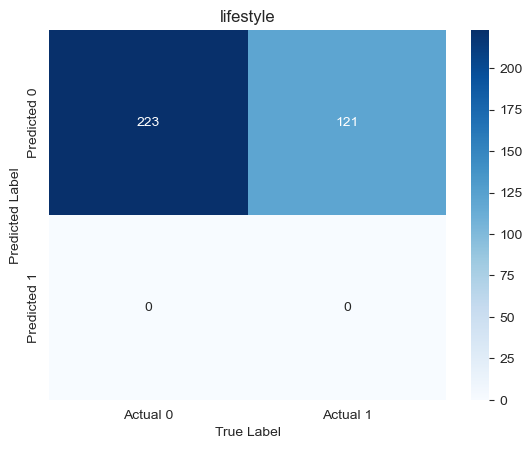

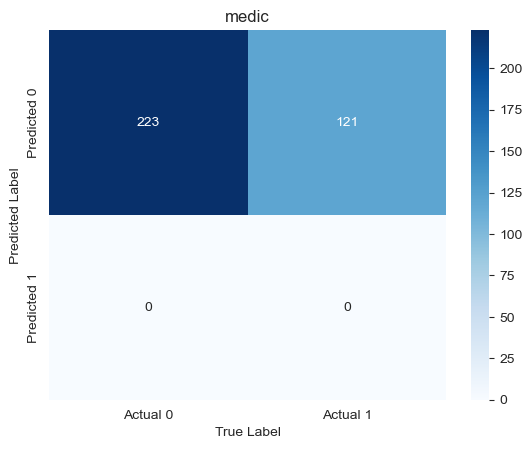

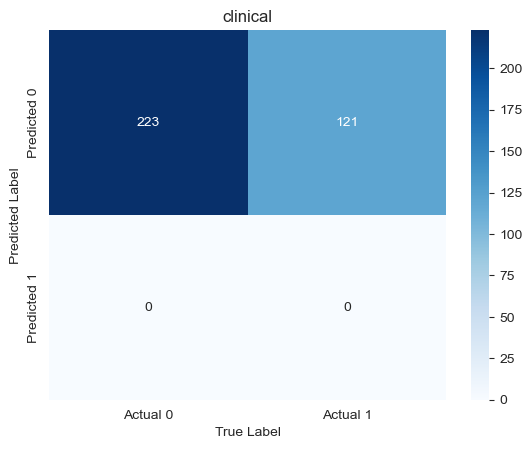

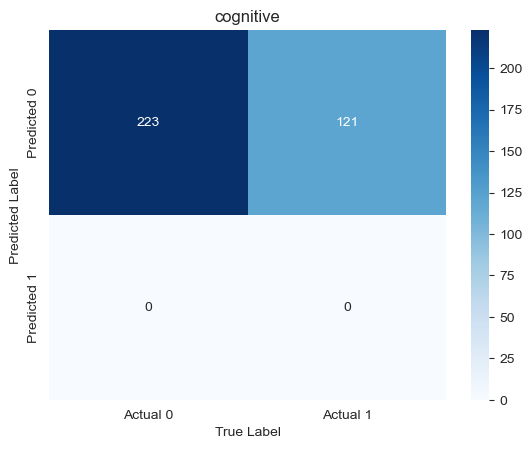

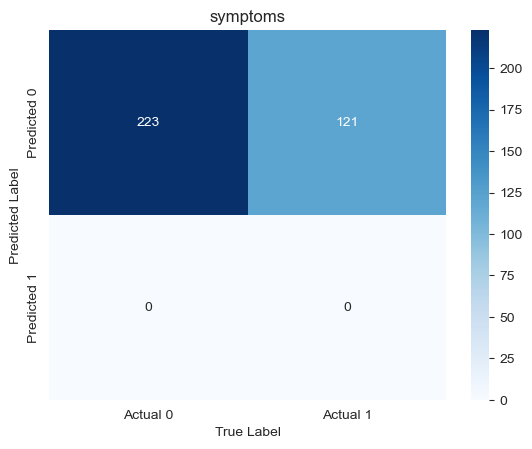

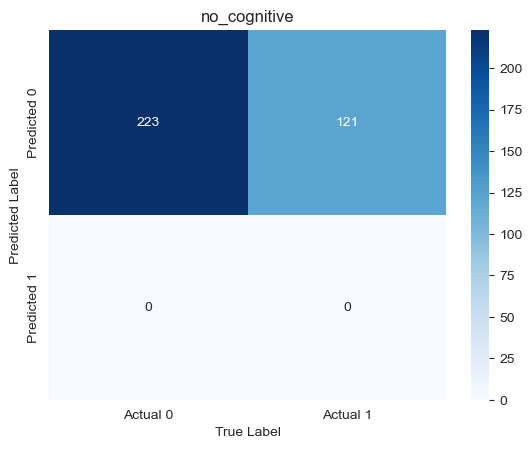

In [105]:
for key,item in sigmoid_conf_matrix.items():
    sns.heatmap(item, annot=True, fmt="d", cmap="Blues", yticklabels=["Predicted 0", "Predicted 1"], xticklabels=["Actual 0", "Actual 1"])
    plt.ylabel("Predicted Label")
    plt.xlabel("True Label")
    plt.title(key)
    plt.show()

## Decision Trees

In [23]:
## Importing the packages
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [107]:
## Accuracy score for each subcategory of features
tree_accu_score = {}

## Confusion matrix for each subcategory of features
tree_conf_matrix = {}

## Running the classifier through each subcategory
for key in subcategory_dict:
    item = subcategory_dict[key]

    ## creating a decision tree classifier with max_depth = 10
    tree_clf = DecisionTreeClassifier(max_depth= 12 , random_state= 123)
    
    ## fit the model object
    tree_clf.fit(df_train[item[:-1]], df_train.Diagnosis)

    ## predict the testing set
    pred = tree_clf.predict(df_test[item[:-1]])

    ## saving accuracy score
    tree_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                            precision_score(pred, df_test.Diagnosis),
                            recall_score(pred, df_test.Diagnosis),
                            f1_score(pred, df_test.Diagnosis),
                            root_mean_squared_error(pred, df_test.Diagnosis)]
    tree_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

tree_accu_score_df = pd.DataFrame(tree_accu_score)
tree_accu_score_df.index = ['Accuracy Score', 'Precision Score' , 'Recall Score', 'F1 Score', 'MSE']
tree_accu_score_df

C:\Users\banih\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.886628,0.578488,0.601744,0.651163,0.581395,0.936047,0.648256,0.555233
Precision Score,0.801653,0.289256,0.157025,0.024793,0.223140,0.884298,0.000000,0.223140
Recall Score,0.866071,0.372340,0.351852,0.600000,0.350649,0.930435,0.000000,0.313953
F1 Score,0.832618,0.325581,0.217143,0.047619,0.272727,0.906780,0.000000,0.260870
MSE,0.336708,0.649239,0.631075,0.590624,0.646997,0.252890,0.593080,0.666909


#### Decision Tree Confusion Matrices

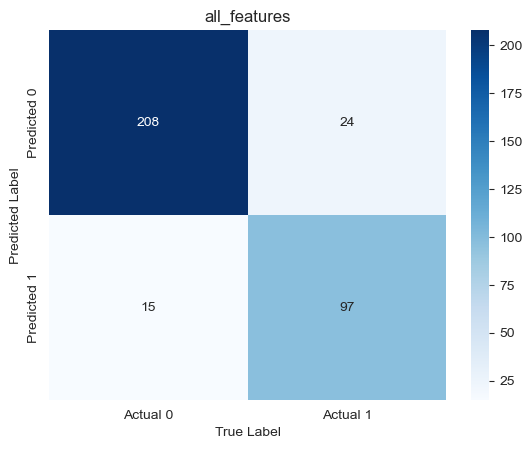

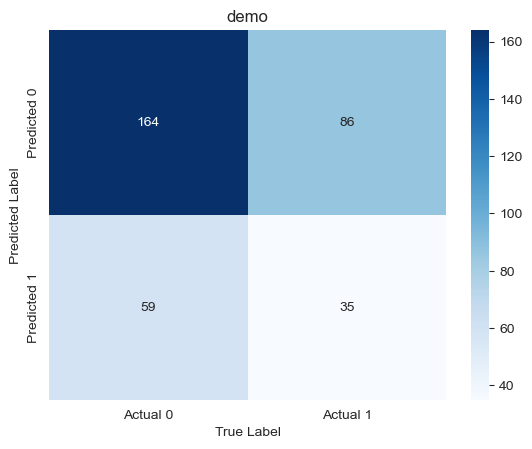

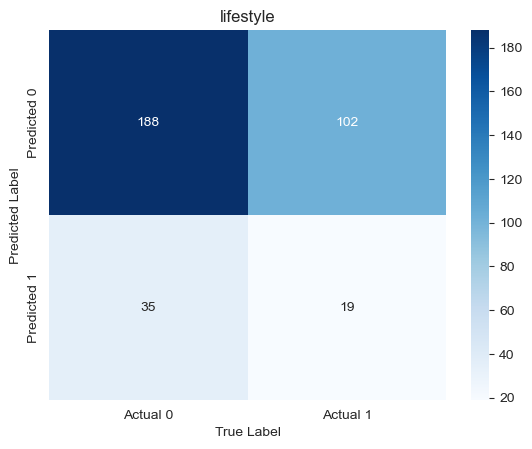

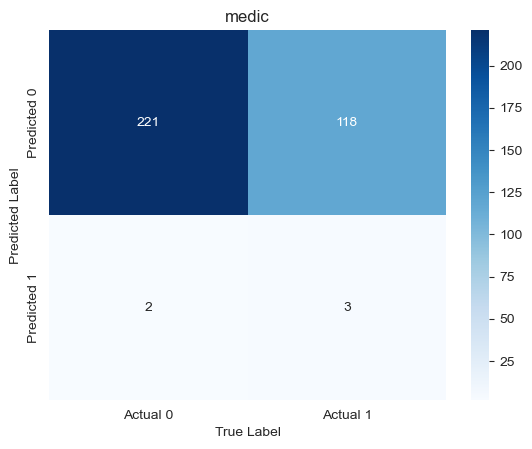

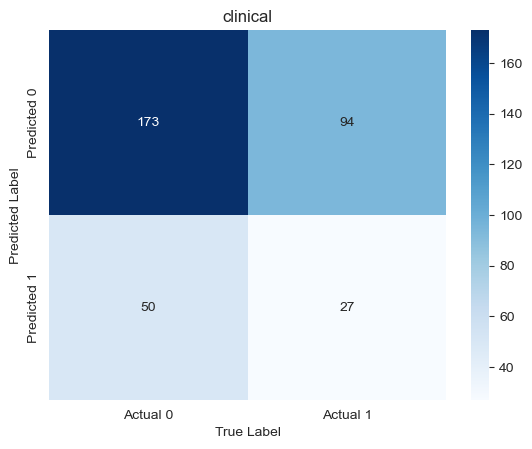

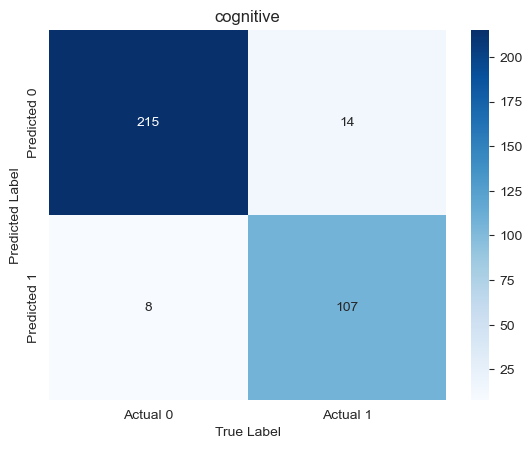

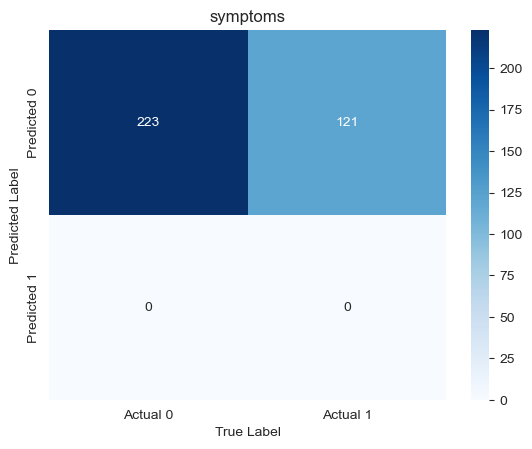

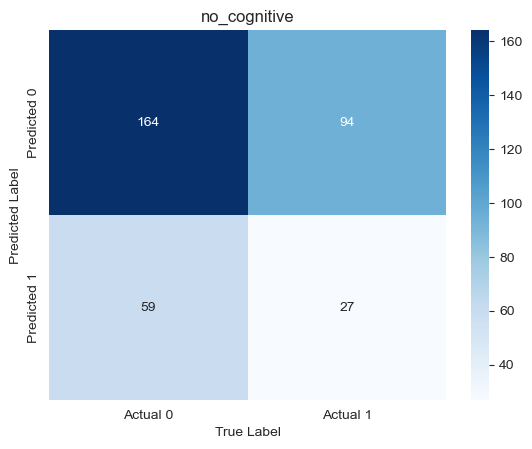

In [110]:
for key,item in tree_conf_matrix.items():
    sns.heatmap(item, annot=True, fmt="d", cmap="Blues", yticklabels=["Predicted 0", "Predicted 1"], xticklabels=["Actual 0", "Actual 1"])
    plt.ylabel("Predicted Label")
    plt.xlabel("True Label")
    plt.title(key)
    plt.show()

## Adaptive Boosting 

We will try the Adaptive Boost (AdaBoost) Classifier and optimize the learning rate parameter.

In [28]:
## Importing the packages
from sklearn.ensemble import AdaBoostClassifier

In [112]:
## Accuracy score for each subcategory of features
ada_accu_score = {}

## Confusion matrix for each subcategory of features
ada_conf_matrix = {}

## Setting range for the learning rates
learning_rates = [1,0.9,0.8,0.7,0.6,0.5]

## Running the classifier through each subcategory
for key in subcategory_dict:
    item = subcategory_dict[key]

    ## variables that record to most accurate parameters
    rate_best = 0
    accu_best = 0
    f1_best = 0
    precision_best = 0
    recall_best = 0
    mse_best = 0
    confusion_best = 0

    for rate in learning_rates:    
        ## creating an AdaBoost classifier with a shallow decision tree of max_depth = 10, and learning rate = rate.
        ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                                     n_estimators=100,
                                     algorithm = 'SAMME',
                                     learning_rate = rate,
                                     random_state=123)
        
        ## fit the model object
        ada_clf.fit(df_train[item[:-1]], df_train.Diagnosis)
    
        ## predict the testing set
        pred = ada_clf.predict(df_test[item[:-1]])

        if accuracy_score(pred,df_test.Diagnosis) > accu_best:
            accu_best = accuracy_score(pred,df_test.Diagnosis)
            rate_best = rate
            mse_best = root_mean_squared_error(pred, df_test.Diagnosis)
            f1_best = f1_score(pred, df_test.Diagnosis)
            precision_best = precision_score(pred, df_test.Diagnosis)
            recall_best = recall_score(pred, df_test.Diagnosis)
            confusion_best = confusion_matrix(pred, df_test.Diagnosis)
        
    ## saving accuracy score
    ada_accu_score[key] = [accu_best , precision_best , recall_best , f1_best, mse_best, rate_best]
    ada_conf_matrix[key] = confusion_best

ada_accu_score_df = pd.DataFrame(ada_accu_score)
ada_accu_score_df.index = ['Accuracy Score', 'Precision Score' , 'Recall Score', 'F1 Score','MSE', 'Learning Rate']
ada_accu_score_df


,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.965116,0.645349,0.654070,0.648256,0.639535,0.959302,0.639535,0.642442
Precision Score,0.933884,0.057851,0.016529,0.024793,0.066116,0.917355,0.008264,0.057851
Recall Score,0.965812,0.466667,1.000000,0.500000,0.421053,0.965217,0.200000,0.437500
F1 Score,0.949580,0.102941,0.032520,0.047244,0.114286,0.940678,0.015873,0.102190
MSE,0.186772,0.595526,0.588158,0.593080,0.600387,0.201737,0.600387,0.597962
Learning Rate,0.600000,0.600000,0.600000,0.900000,0.700000,0.600000,1.000000,0.500000


#### AdaBoost Confusion Matrices

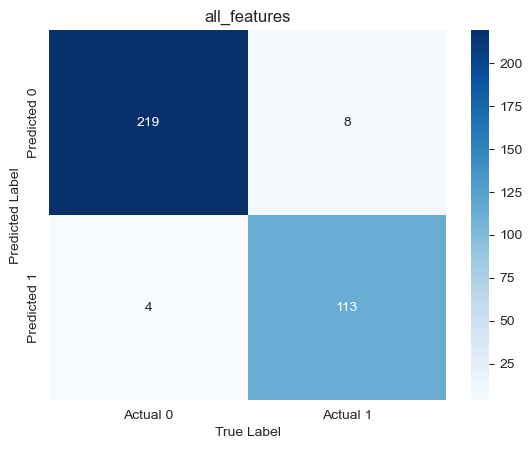

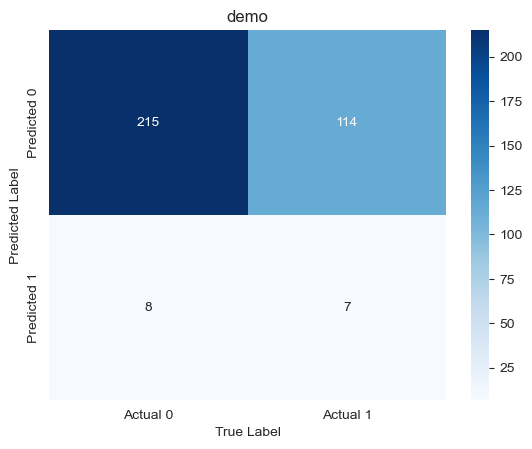

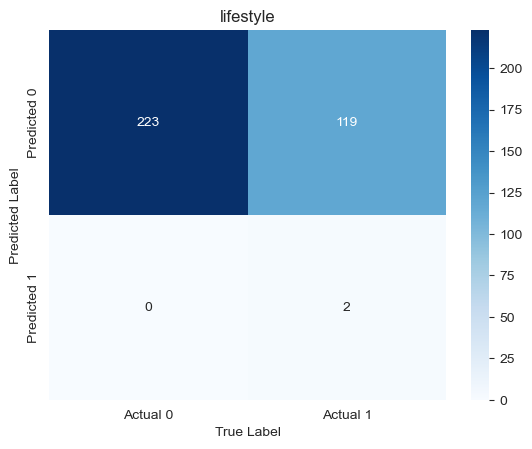

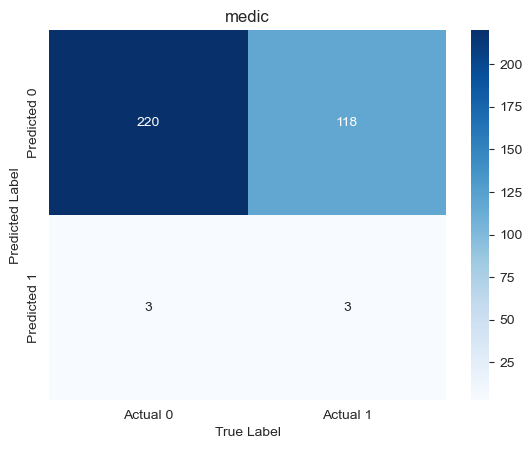

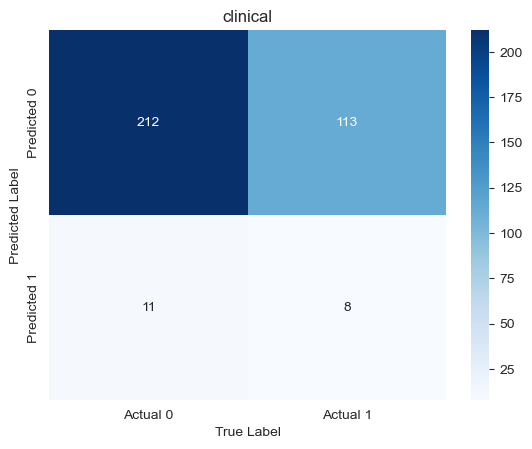

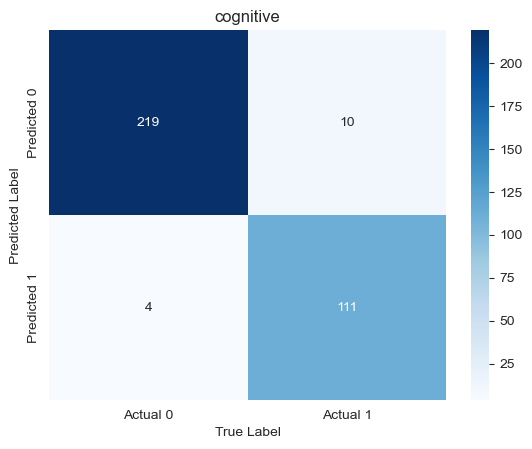

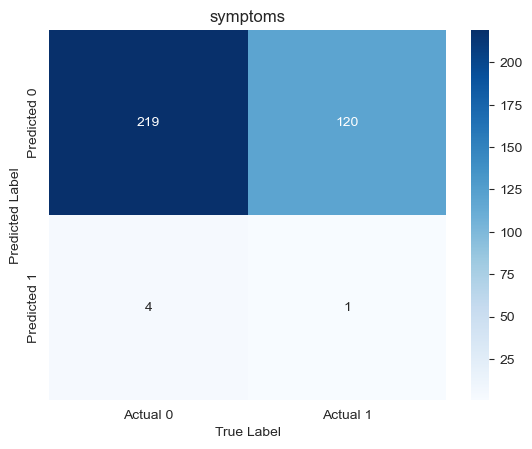

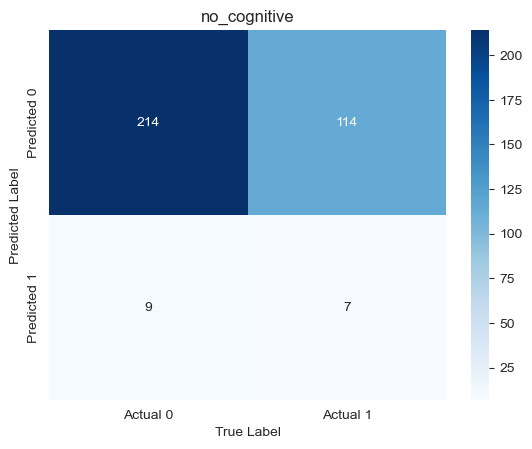

In [115]:
for key,item in ada_conf_matrix.items():
    sns.heatmap(item, annot=True, fmt="d", cmap="Blues", yticklabels=["Predicted 0", "Predicted 1"], xticklabels=["Actual 0", "Actual 1"])
    plt.ylabel("Predicted Label")
    plt.xlabel("True Label")
    plt.title(key)
    plt.show()